In [25]:
import pandas as pd 
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

In [26]:
df_irv = pd.read_csv('../data/proptech_data/irvine.csv')
df_sd = pd.read_csv('../data/proptech_data/san_diego.csv')
df_sf = pd.read_csv('../data/proptech_data/san_francisco.csv')

# join dfs
df_all = pd.concat([df_irv, df_sd, df_sf])

In [27]:
df_all = df_all.sort_values('month_date_yyyymm')
# df_all

In [28]:
df_all.head()

,Unnamed: 0,month_date_yyyymm,postal_code,zip_name,nielsen_hh_rank,hotness_rank,hotness_score,supply_score,demand_score,median_days_on_market,median_dom_vs_us,ldp_unique_viewers_per_property_vs_us,median_listing_price,median_listing_price_vs_us,quality_flag,id,population,area (sq mi),pop_density,city
3520,95136,201708,95136,"san jose, ca",1411,110,95.437081,95.550514,95.323649,23.5,-43.0,3.0880,868526.0,3.1130,0,31,48492,4.661,10403.776014,San Francisco
1767,94589,201708,94589,"vallejo, ca",4636,3,98.340591,98.379011,98.302170,14.0,-52.5,4.3312,339975.0,1.2185,0,92,30206,11.493,2628.208475,San Francisco
1721,94588,201708,94588,"pleasanton, ca",3268,364,91.807238,87.182114,96.432361,36.5,-30.0,3.3893,1084000.0,3.8853,0,39,36324,31.806,1142.048670,San Francisco
622,92691,201708,92691,"mission viejo, ca",1323,1526,81.265323,92.985473,69.545172,28.5,-38.0,1.4098,687000.0,2.4624,0,7,50033,8.802,5684.276301,Irvine
1675,94559,201708,94559,"napa, ca",4204,1134,84.176150,76.029127,92.323173,48.5,-18.0,2.6016,754450.0,2.7041,0,90,27564,36.580,753.526517,San Francisco


In [33]:
'''keep median listing price'''
df_price = df_all.loc[:, ['month_date_yyyymm', 'median_listing_price']]
df_price = df_price.rename({'month_date_yyyymm': 'date', 'median_listing_price': 'price'}, axis=1)
df_price.head()

,date,price
3520,201708,868526.0
1767,201708,339975.0
1721,201708,1084000.0
622,201708,687000.0
1675,201708,754450.0


In [38]:
'''aggregate using avg value based on date'''
df_price = df_price.groupby('date').agg('max')
print('rows: ', len(df_price))
df_price.head()

rows:  54


,price
date,
201708,3345000.0
201709,7950000.0
201710,7946500.0
201711,3445000.0
201712,3895000.0


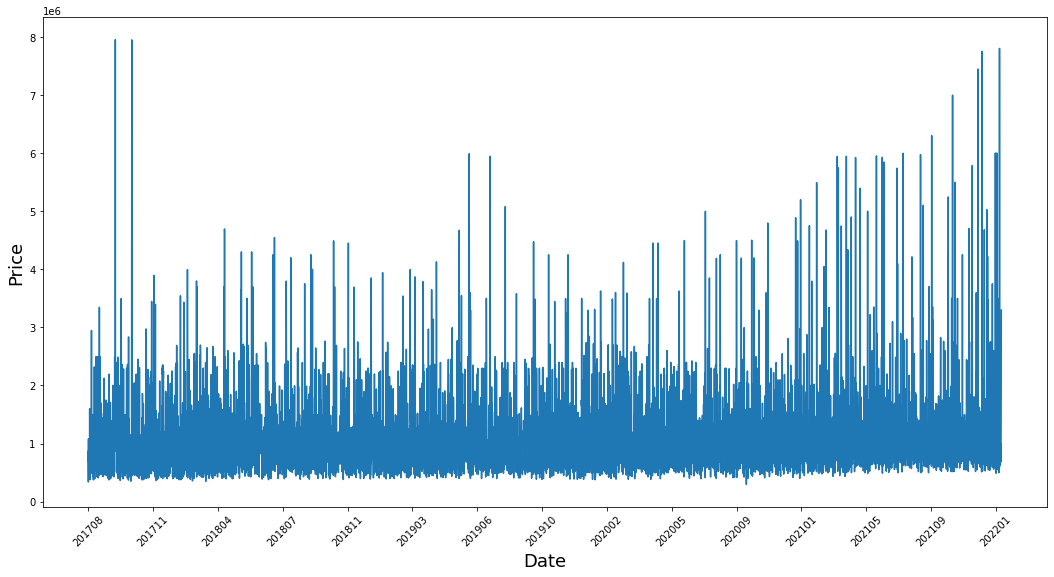

In [18]:
plt.figure(figsize = (18,9))
plt.plot(range(df_all.shape[0]),(df_all['median_listing_price']))
plt.xticks(range(0,df_all.shape[0],500),df_all['month_date_yyyymm'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.show()